In [34]:
# Data management
# ------------------------------------------------------------------------------
import numpy as np
import pandas as pd

# Graphics
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt

# Preprocessing and modelling
# ------------------------------------------------------------------------------
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor

from sklearn.tree import plot_tree
from sklearn.tree import export_graphviz
from sklearn.tree import export_text
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from dmba import plotDecisionTree, classificationSummary, regressionSummary


# Configuración warnings
# ------------------------------------------------------------------------------
import warnings
#warnings.filterwarnings('once')
warnings.filterwarnings('ignore')

In [35]:
# Data Loading


#training data
data_train = pd.read_csv('mobile_train.csv')
data_train.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [36]:
# Configuring train and test datasets
# ------------------------------------------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(
                                        data_train.drop(columns = "price_range"),
                                        data_train['price_range'],
                                        train_size= 0.7, # by default 0.75 is the amunt of data for training
                                        random_state = 123
                                                                            )
                                                                            

In [37]:
X_train


,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
1404,1447,0,0.5,0,3,0,40,0.7,184,2,5,963,1062,471,8,4,20,0,0,1
172,625,1,1.2,1,5,1,10,0.2,183,4,8,635,842,3323,9,1,7,1,1,1
712,1624,0,1.6,1,8,0,28,0.4,150,2,10,689,699,2473,16,11,2,1,0,0
866,1664,1,2.9,1,9,1,15,0.5,177,7,19,1178,1929,1968,12,7,9,1,0,0
1217,1451,1,0.5,0,5,1,57,0.6,181,8,12,812,1456,3038,15,7,18,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1122,1871,0,2.1,0,4,1,41,0.4,144,8,5,275,1966,2727,15,8,11,1,0,0
1346,1446,1,2.8,1,0,1,18,0.3,178,8,1,351,1769,3340,8,0,16,1,1,1
1406,1731,1,2.3,1,18,0,60,0.5,171,4,20,142,1039,1220,9,3,20,0,1,0
1389,1801,0,0.5,1,6,0,52,0.9,120,6,10,100,1708,258,14,8,9,1,0,0


In [38]:
y_train

1404    0
172     2
712     2
866     2
1217    3
       ..
1122    3
1346    3
1406    1
1389    0
1534    2
Name: price_range, Length: 1400, dtype: int64

In [39]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1400 entries, 1404 to 1534
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  1400 non-null   int64  
 1   blue           1400 non-null   int64  
 2   clock_speed    1400 non-null   float64
 3   dual_sim       1400 non-null   int64  
 4   fc             1400 non-null   int64  
 5   four_g         1400 non-null   int64  
 6   int_memory     1400 non-null   int64  
 7   m_dep          1400 non-null   float64
 8   mobile_wt      1400 non-null   int64  
 9   n_cores        1400 non-null   int64  
 10  pc             1400 non-null   int64  
 11  px_height      1400 non-null   int64  
 12  px_width       1400 non-null   int64  
 13  ram            1400 non-null   int64  
 14  sc_h           1400 non-null   int64  
 15  sc_w           1400 non-null   int64  
 16  talk_time      1400 non-null   int64  
 17  three_g        1400 non-null   int64  
 18  touch_scre

In [40]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 600 entries, 1342 to 1701
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  600 non-null    int64  
 1   blue           600 non-null    int64  
 2   clock_speed    600 non-null    float64
 3   dual_sim       600 non-null    int64  
 4   fc             600 non-null    int64  
 5   four_g         600 non-null    int64  
 6   int_memory     600 non-null    int64  
 7   m_dep          600 non-null    float64
 8   mobile_wt      600 non-null    int64  
 9   n_cores        600 non-null    int64  
 10  pc             600 non-null    int64  
 11  px_height      600 non-null    int64  
 12  px_width       600 non-null    int64  
 13  ram            600 non-null    int64  
 14  sc_h           600 non-null    int64  
 15  sc_w           600 non-null    int64  
 16  talk_time      600 non-null    int64  
 17  three_g        600 non-null    int64  
 18  touch_scree

# CART

In [41]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

# One-hot-encoding of the categoric variables
# ------------------------------------------------------------------------------
# Identification of categoric and numerical variables/column
cat_cols = X_train.select_dtypes(include=['object', 'category']).columns.to_list()
numeric_cols = X_train.select_dtypes(include=['float64', 'int64']).columns.to_list()

In [42]:
cat_cols

[]

In [43]:
numeric_cols

['battery_power',
 'blue',
 'clock_speed',
 'dual_sim',
 'fc',
 'four_g',
 'int_memory',
 'm_dep',
 'mobile_wt',
 'n_cores',
 'pc',
 'px_height',
 'px_width',
 'ram',
 'sc_h',
 'sc_w',
 'talk_time',
 'three_g',
 'touch_screen',
 'wifi']

In [44]:
# One-hot-encoding of the categoric variables
# ------------------------------------------------------------------------------
# Application of one-hot-encoding only to the categorical variables
preprocessor = ColumnTransformer(
                    [('onehot', OneHotEncoder(handle_unknown='ignore'), cat_cols)],
                    remainder='passthrough'
               )

# Once the object ColumnTransformer was created, using the method fit()
# the transforms are applied to the taining and test datasets
# using transform(). Both operations at the same time using fit_transform().
X_train_prep = preprocessor.fit_transform(X_train)
X_test_prep  = preprocessor.fit_transform(X_test)

In [45]:
# Cheking NaN /null values
X_train.isnull().sum()*100/X_train.shape[0]

battery_power    0.0
blue             0.0
clock_speed      0.0
dual_sim         0.0
fc               0.0
four_g           0.0
int_memory       0.0
m_dep            0.0
mobile_wt        0.0
n_cores          0.0
pc               0.0
px_height        0.0
px_width         0.0
ram              0.0
sc_h             0.0
sc_w             0.0
talk_time        0.0
three_g          0.0
touch_screen     0.0
wifi             0.0
dtype: float64

In [46]:
# Obtaining names of columns for creation of a dataframe
#encoded_cat = preprocessor.named_transformers_['onehot'].get_feature_names(cat_cols)
#labels = np.concatenate([numeric_cols, encoded_cat])
labels = np.concatenate([numeric_cols])

In [47]:
labels

array(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi'], dtype='<U13')

In [48]:
# Conversion to dataframe
X_train_prep = pd.DataFrame(X_train_prep, columns=labels)
X_test_prep  = pd.DataFrame(X_test_prep, columns=labels)
X_train_prep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1400 entries, 0 to 1399
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  1400 non-null   float64
 1   blue           1400 non-null   float64
 2   clock_speed    1400 non-null   float64
 3   dual_sim       1400 non-null   float64
 4   fc             1400 non-null   float64
 5   four_g         1400 non-null   float64
 6   int_memory     1400 non-null   float64
 7   m_dep          1400 non-null   float64
 8   mobile_wt      1400 non-null   float64
 9   n_cores        1400 non-null   float64
 10  pc             1400 non-null   float64
 11  px_height      1400 non-null   float64
 12  px_width       1400 non-null   float64
 13  ram            1400 non-null   float64
 14  sc_h           1400 non-null   float64
 15  sc_w           1400 non-null   float64
 16  talk_time      1400 non-null   float64
 17  three_g        1400 non-null   float64
 18  touch_sc

## Árbol completo de 10 niveles

In [49]:
# Creating the model with decision tree
# ------------------------------------------------------------------------------
model = DecisionTreeClassifier(
            max_depth         = 10,
            criterion         = 'gini',
            random_state      = 123
          )

# Entrenamiento del modelo
# ------------------------------------------------------------------------------
model.fit(X_train_prep, y_train)

DecisionTreeClassifier(max_depth=10, random_state=123)

Tree Depth: 10
Number of leaves or terminal nodes: 129


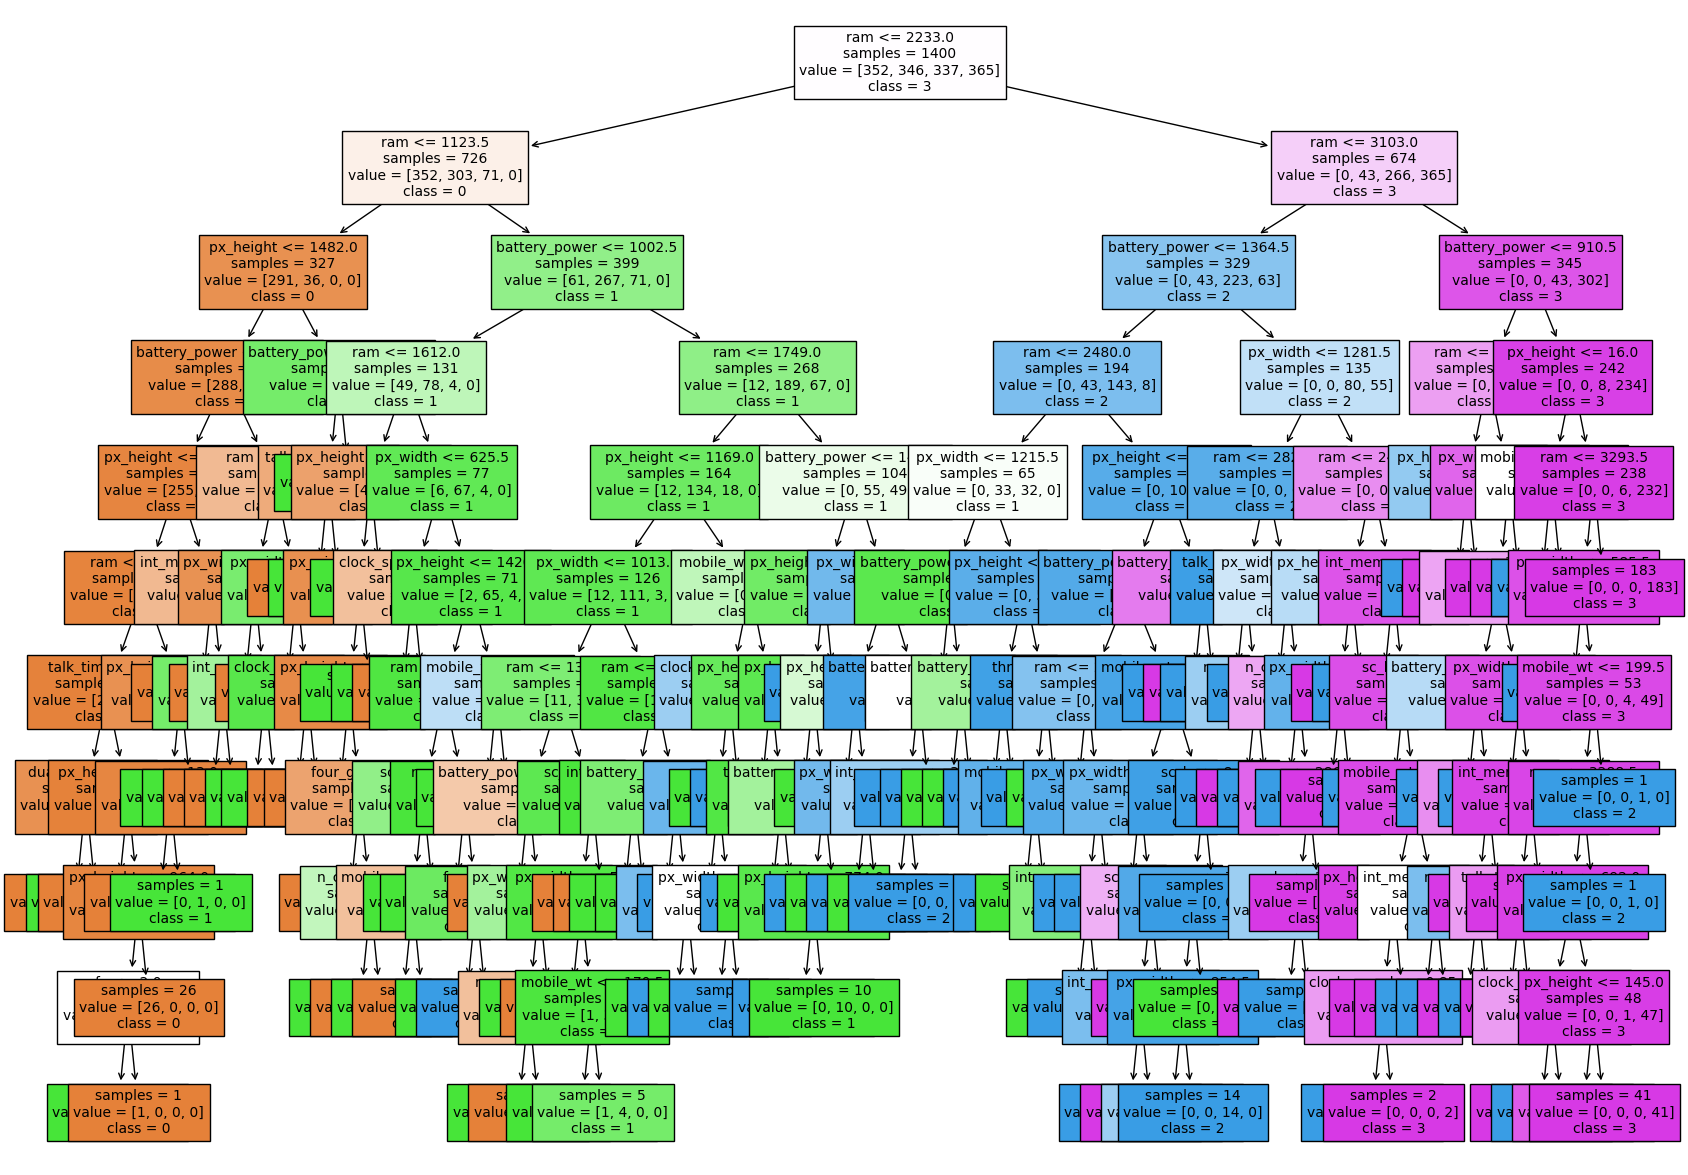

In [50]:
# Estructura del árbol creado
# ------------------------------------------------------------------------------
fig, ax = plt.subplots(figsize=(20, 15))

print(f"Tree Depth: {model.get_depth()}")
print(f"Number of leaves or terminal nodes: {model.get_n_leaves()}")

plot = plot_tree(
            decision_tree = model,
            feature_names = labels.tolist(),
            class_names   = ['0', '1', '2', '3'],
            filled        = True,
            impurity      = False,
            fontsize      = 10,
            ax            = ax
       )

In [51]:
# get the text representation
from sklearn import tree
#text_representation = tree.export_text(model)  # generic features

text_representation = tree.export_text(model, feature_names= list(X_train_prep.columns.values) )



print(text_representation)

|--- ram <= 2233.00
|   |--- ram <= 1123.50
|   |   |--- px_height <= 1482.00
|   |   |   |--- battery_power <= 1804.00
|   |   |   |   |--- px_height <= 1231.50
|   |   |   |   |   |--- ram <= 1024.00
|   |   |   |   |   |   |--- talk_time <= 2.50
|   |   |   |   |   |   |   |--- dual_sim <= 0.50
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |--- dual_sim >  0.50
|   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- talk_time >  2.50
|   |   |   |   |   |   |   |--- px_height <= 962.00
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |--- px_height >  962.00
|   |   |   |   |   |   |   |   |--- px_height <= 964.00
|   |   |   |   |   |   |   |   |   |--- fc <= 2.00
|   |   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |   |--- fc >  2.00
|   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |--- px_height >  964.00
|   |   |   |   |   |   |   |   | 

In [52]:
# Model training error
#-------------------------------------------------------------------------------
predictions_train = model.predict(X = X_train_prep,)

print("Confussion Matrix -- TRAIN")
print("-------------------")
confusion_matrix(
    y_true    = y_train,
    y_pred    = predictions_train
)

Confussion Matrix -- TRAIN
-------------------


array([[351,   1,   0,   0],
       [  0, 345,   1,   0],
       [  0,   0, 336,   1],
       [  0,   0,   0, 365]], dtype=int64)

In [53]:
accuracy_train = accuracy_score(
            y_true    = y_train,
            y_pred    = predictions_train,
            normalize = True
           )
#print(f"Accuracy in train : {100 * accuracy_train} %")
print("\n Accuracy in train 1s: {:.2f} %".format(100 * accuracy_train))


 Accuracy in train 1s: 99.79 %


In [54]:
# Model test error
#-------------------------------------------------------------------------------
predictions_test = model.predict(X = X_test_prep,)

print("Confussion Matrix -- TEST")
print("-------------------")
confusion_matrix(
    y_true    = y_test,
    y_pred    = predictions_test
)

Confussion Matrix -- TEST
-------------------


array([[132,  16,   0,   0],
       [ 20, 123,  11,   0],
       [  0,  21, 120,  22],
       [  0,   0,  13, 122]], dtype=int64)

In [55]:
accuracy_test = accuracy_score(
            y_true    = y_test,
            y_pred    = predictions_test,
            normalize = True
           )
#print(f"Accuracy in test 1s: {100 * accuracy_test} %")

print("\n Accuracy in test 1s: {:.2f} %".format(100 * accuracy_test))



 Accuracy in test 1s: 82.83 %


## Árbol Podado

In [56]:
# First METHOD COMMON-SENSE selection of alpha based on cost-complexity values

#Obtaining diferent options of alpha values

path = model.cost_complexity_pruning_path(X_train_prep, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [57]:
path

{'ccp_alphas': array([0.00000000e+00, 1.74319728e-04, 2.43697479e-04, 3.92156863e-04,
        4.73975637e-04, 6.73144258e-04, 6.74603175e-04, 6.88775510e-04,
        6.93877551e-04, 7.00000000e-04, 7.02179177e-04, 7.04852871e-04,
        7.16061072e-04, 9.09946927e-04, 9.52380952e-04, 9.52380952e-04,
        1.07142857e-03, 1.07142857e-03, 1.07142857e-03, 1.07142857e-03,
        1.07142857e-03, 1.07142857e-03, 1.14285714e-03, 1.20718463e-03,
        1.22100548e-03, 1.26896041e-03, 1.29870130e-03, 1.30732293e-03,
        1.30952381e-03, 1.33540373e-03, 1.34453782e-03, 1.34920635e-03,
        1.37142857e-03, 1.38528139e-03, 1.39875396e-03, 1.40659341e-03,
        1.42857143e-03, 1.44639237e-03, 1.49908425e-03, 1.60714286e-03,
        1.71428571e-03, 1.71428571e-03, 1.73160173e-03, 1.90476190e-03,
        1.90476190e-03, 1.90476190e-03, 1.92857143e-03, 1.93548387e-03,
        1.98220573e-03, 2.05782313e-03, 2.13770244e-03, 2.15956344e-03,
        2.22222222e-03, 2.25417440e-03, 2.28571429

Text(0.5, 1.0, 'Total Impurity vs effective alpha for training set')

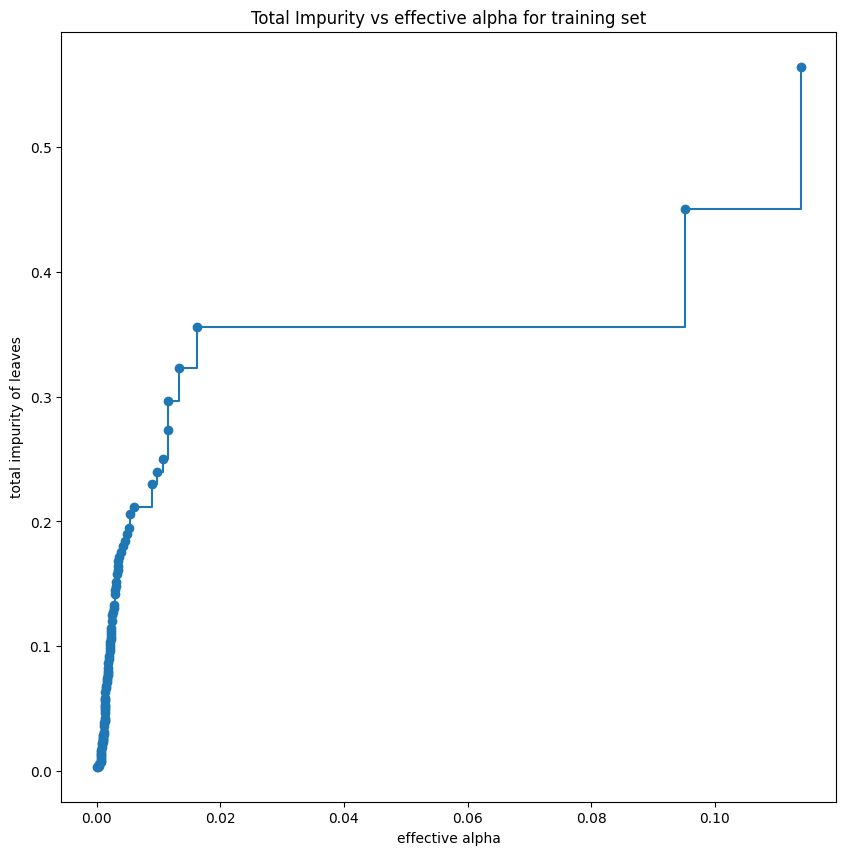

In [58]:
# Representation Impurity vs effective alpha for training set

fig, ax = plt.subplots(figsize=(10,10))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")

In [59]:
# Different alpha options are tried
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train_prep, y_train)
    clfs.append(clf)
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
      clfs[-1].tree_.node_count, ccp_alphas[-1]))

Number of nodes in the last tree is: 1 with ccp_alpha: 0.18511350922447112


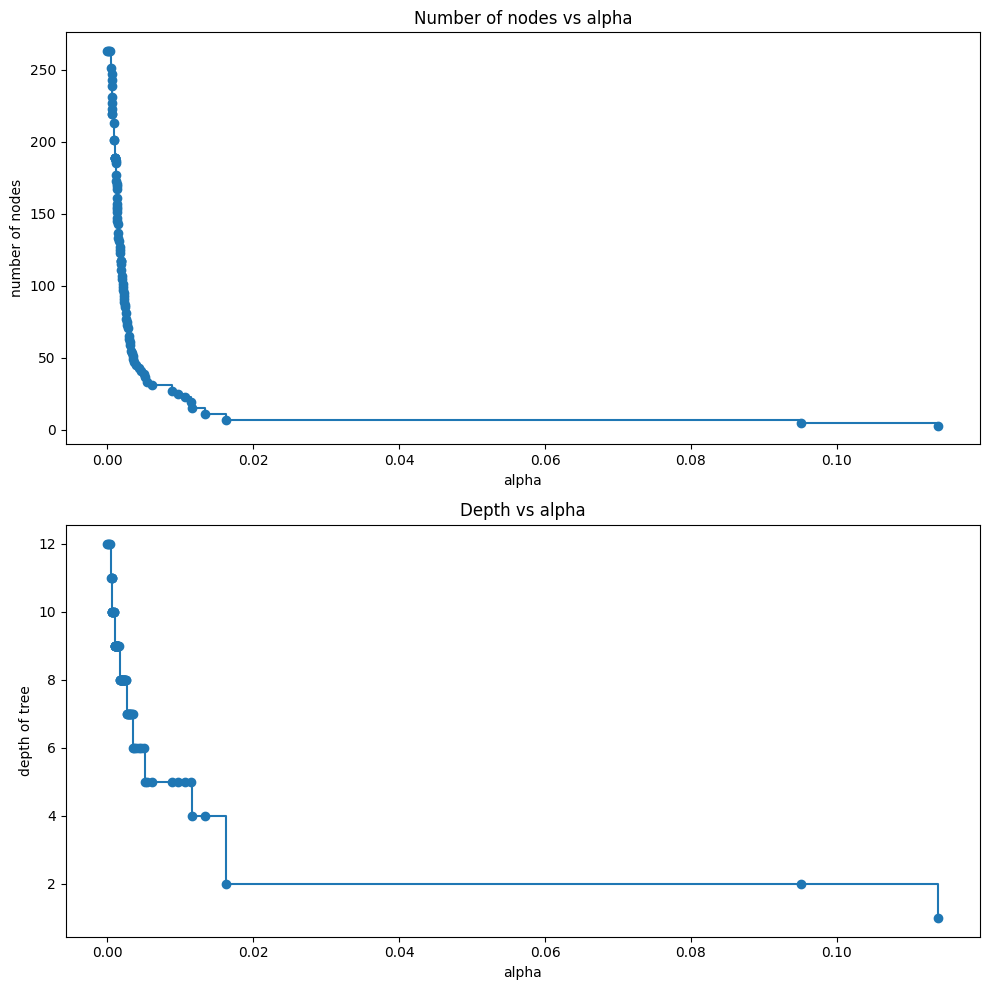

In [60]:
# we remove the last element in clfs and ccp_alphas, because it is the trivial tree with only one node
# This is not classification

clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots( 2, 1, figsize=(10,10))
ax[0].plot(ccp_alphas, node_counts, marker='o', drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker='o', drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

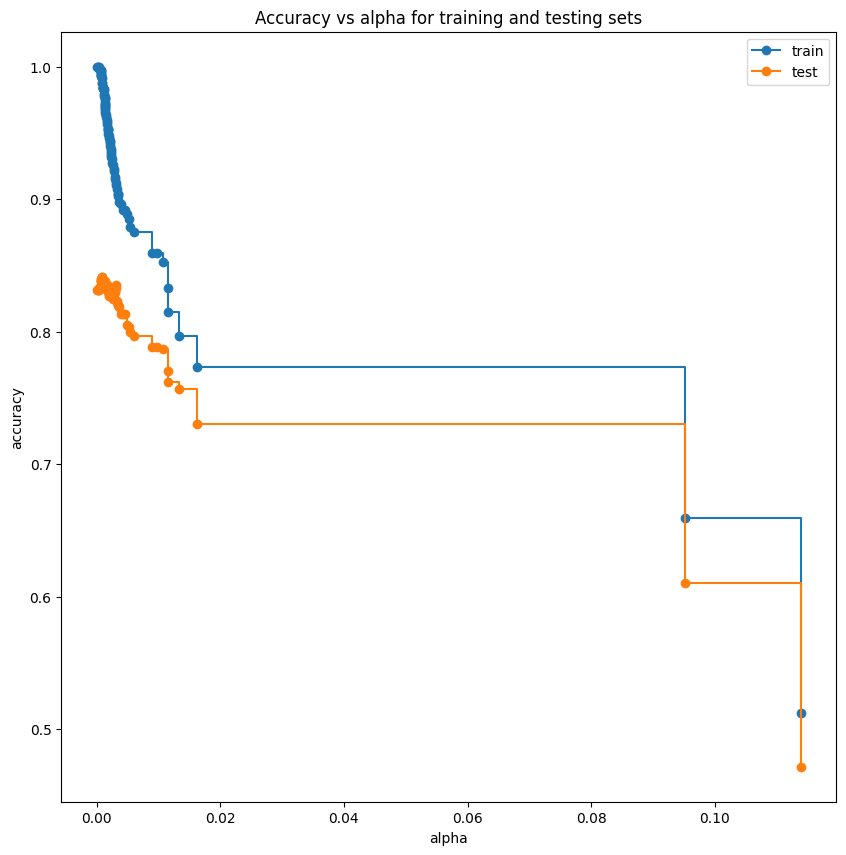

In [61]:
# Cheking scores in training and test datasets for different alphas

train_scores = [clf.score(X_train_prep, y_train) for clf in clfs]
test_scores = [clf.score(X_test_prep, y_test) for clf in clfs]

fig, ax = plt.subplots(figsize=(10,10))
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In [62]:
# the scores obtained are now printed and ordered by the best test score

eva_df = pd.DataFrame({'ccp_alphas': ccp_alphas, 'train_scores': train_scores, 'test_scores': test_scores})
eva_df = eva_df.sort_values(['test_scores'], ascending = False)
eva_df.head(10)

,ccp_alphas,train_scores,test_scores
15,0.000952,0.987857,0.841667
14,0.000952,0.987857,0.841667
11,0.000705,0.992857,0.840000
12,0.000716,0.992857,0.840000
13,0.000910,0.991429,0.840000
28,0.001310,0.975714,0.838333
8,0.000694,0.995000,0.838333
9,0.000700,0.994286,0.838333
10,0.000702,0.993571,0.838333
35,0.001407,0.967857,0.836667


In [63]:
# Obtaining the best alpha from the previous list
best_alpha= eva_df.iloc[0][0]

best_alpha

0.0009523809523809524

In [64]:
# fit the pruned tree with best alpha
import pydotplus
from dmba import plotDecisionTree, classificationSummary, regressionSummary

prunedtree_I = DecisionTreeClassifier(ccp_alpha=best_alpha, random_state=0)

prunedtree_I.fit(X_train_prep, y_train)


classificationSummary(y_train, prunedtree_I.predict(X_train_prep))
classificationSummary(y_test, prunedtree_I.predict(X_test_prep))

Confusion Matrix (Accuracy 0.9879)

       Prediction
Actual   0   1   2   3
     0 347   5   0   0
     1   2 341   3   0
     2   0   1 332   4
     3   0   0   2 363
Confusion Matrix (Accuracy 0.8417)

       Prediction
Actual   0   1   2   3
     0 134  14   0   0
     1  22 121  11   0
     2   0  15 129  19
     3   0   0  14 121


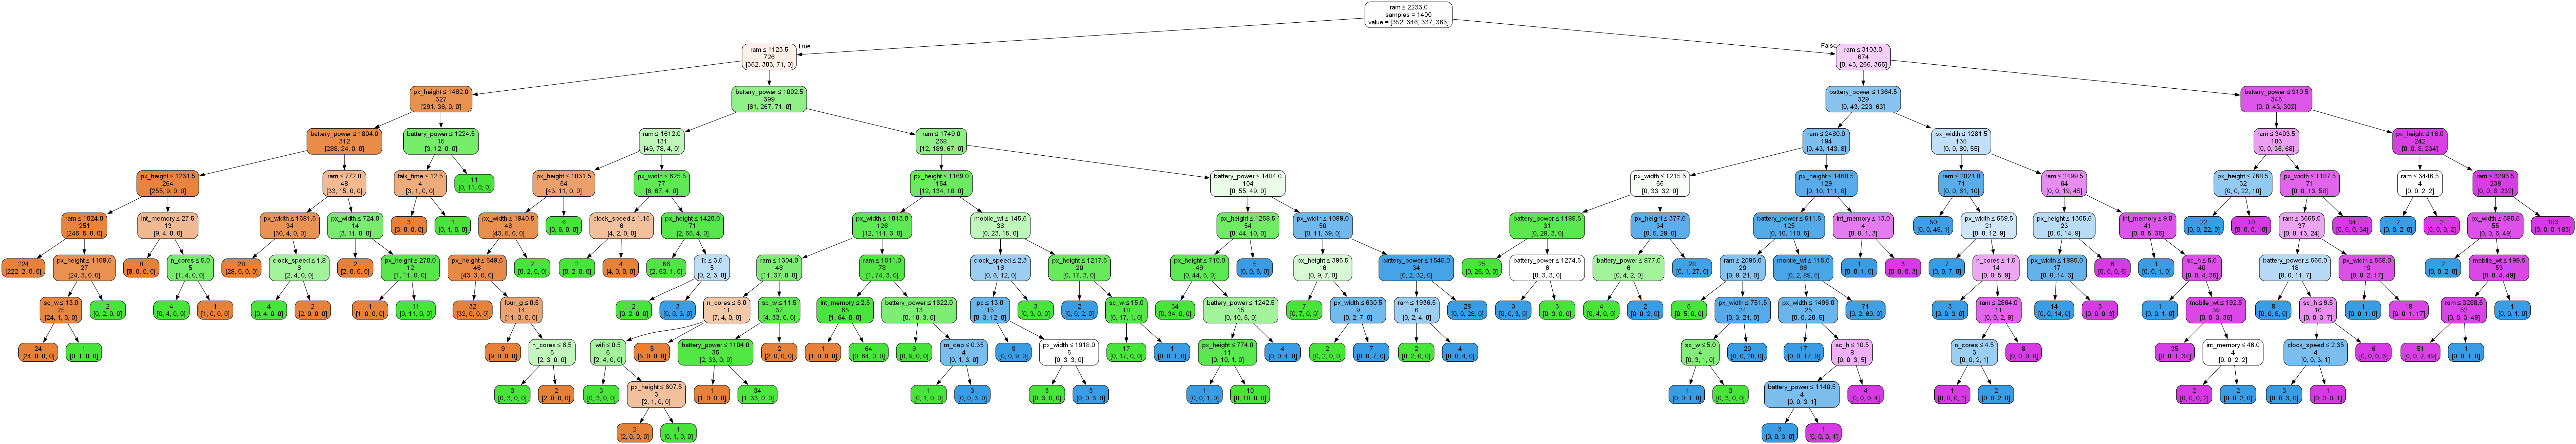

In [32]:
plotDecisionTree(prunedtree_I, feature_names=X_train_prep.columns)

In [33]:
# Final pruned tree
# ------------------------------------------------------------------------------
#model_final = grid.best_estimator_
print(f" Tree Depth: {prunedtree_I.get_depth()}")
print(f"Number of terminal nodes: {prunedtree_I.get_n_leaves()}")

 Tree Depth: 10
Number of terminal nodes: 104


### Tras podar el árbol, la precisión baja ligeramente de 99.79% a 98.79%

## Implementación

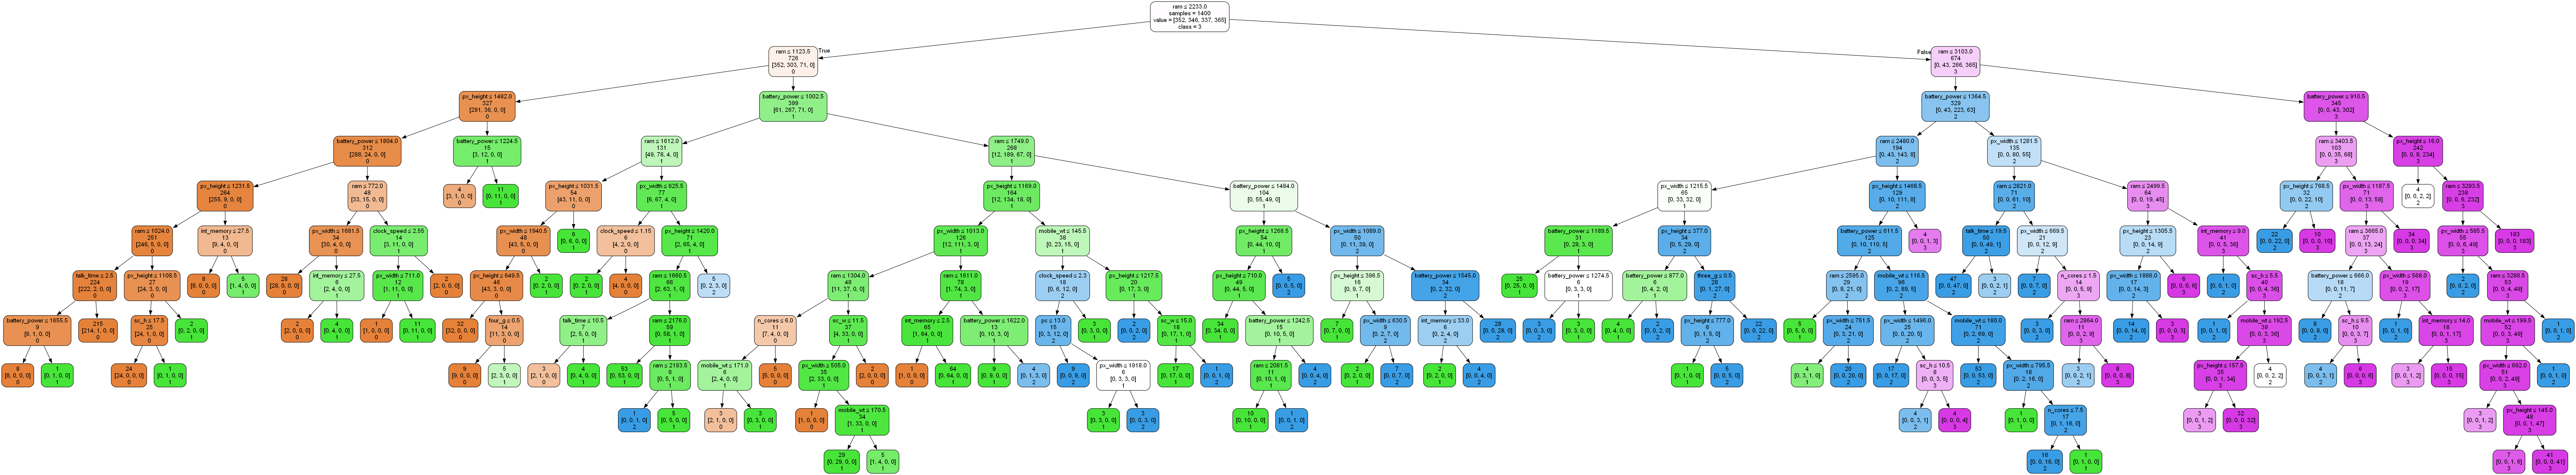

In [74]:
# Implementation
# Now fit a model with all the data we have so that it's more robust
tree_final = DecisionTreeClassifier(random_state = 1, max_depth=10, min_impurity_decrease=0.0001, min_samples_split=6)
tree_final.fit(X_train_prep, y_train)
plotDecisionTree(tree_final, feature_names = X_train_prep.columns,class_names   = ['0', '1', '2', '3'])

In [66]:
print("Importance of predictors ")
print("-------------------------------------------")
importance_predictors = pd.DataFrame(
                            {'predictor': labels.tolist(),
                             'importance': tree_final.feature_importances_}
                            )
importance_predictors.sort_values('importance', ascending=False)

Importance of predictors 
-------------------------------------------


,predictor,importance
13,ram,0.658835
0,battery_power,0.096840
12,px_width,0.096261
11,px_height,0.087154
6,int_memory,0.013171
8,mobile_wt,0.011589
2,clock_speed,0.008613
14,sc_h,0.008400
9,n_cores,0.007347
15,sc_w,0.005172


In [75]:
# Load data to predict
X_pred = pd.read_csv('mobile_test.csv')
X_pred.head()


,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,...,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,...,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,...,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,...,18,749,810,1773,15,8,7,1,0,1


In [76]:
# Predict price_range
predictions = tree_final.predict_proba(X = X_pred.drop(columns="id"))
predictions

array([[0.        , 0.        , 0.        , 1.        ],
       [0.        , 0.        , 0.        , 1.        ],
       [0.        , 0.        , 1.        , 0.        ],
       ...,
       [0.66666667, 0.33333333, 0.        , 0.        ],
       [0.        , 0.        , 1.        , 0.        ],
       [0.        , 0.        , 1.        , 0.        ]])

In [80]:
# Get Predicted price_ranges
price_range_column_CART = []

for prediction in predictions:
    # Find corresponding price_range
    price_range = 0    #price_range variable corresponds to index.
    max_element = prediction[0]
    
    for i in range (1,len(prediction)): #iterate over array
        if prediction[i] > max_element: #to check max value
            max_element = prediction[i]
            price_range = i

    price_range_column_CART.append(price_range)

price_range_column_CART[:10]

[3, 3, 2, 3, 2, 3, 3, 1, 3, 0]

## Resultados predicciones con CART

In [81]:
# Fill price_range_column
df_pred_CART = X_pred
df_pred_CART["price_range"] = price_range_column_CART
df_pred_CART.head()

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,226,1412,3476,12,7,2,0,1,0,3
1,2,841,1,0.5,1,4,1,61,0.8,191,...,746,857,3895,6,0,7,1,0,0,3
2,3,1807,1,2.8,0,1,0,27,0.9,186,...,1270,1366,2396,17,10,10,0,1,1,2
3,4,1546,0,0.5,1,18,1,25,0.5,96,...,295,1752,3893,10,0,7,1,1,0,3
4,5,1434,0,1.4,0,11,1,49,0.5,108,...,749,810,1773,15,8,7,1,0,1,2


# BAGGING

In [91]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.ensemble import BaggingRegressor
from sklearn.datasets import make_regression
from numpy import mean
from numpy import std

In [138]:
# define the model
from sklearn.ensemble import BaggingClassifier
from sklearn.datasets import make_classification
from sklearn.svm import SVC

# X, y = make_classification(n_samples=100, n_features=4,n_informative=2, n_redundant=0,random_state=0, shuffle=False)

model_best = BaggingClassifier(n_estimators=1000, random_state=123,max_samples=0.8).fit(X_train, y_train)

# evaluate the model



In [139]:
from sklearn import metrics


# Model training error
#-------------------------------------------------------------------------------
prediction_train = model_best.predict(X = X_train)


#Measuring Goodness of fit in Training data

print('R2 Value in training best:', round(metrics.r2_score(y_train, prediction_train),4))

#Measuring accuracy on Testing Data
print('Accuracy in training best',round( 100- (np.mean(np.abs((y_train - prediction_train) / y_train)) * 100), 2))
      
 
residuals_train=y_train - prediction_train

R2 Value in training best: 1.0
Accuracy in training best 100.0


In [140]:
# Model test error
#-------------------------------------------------------------------------------
prediction_test = model_best.predict(X = X_test)


#Measuring accuracy on Testing Data

prediction_test_list = list(prediction_test)
y_test_list = list(y_test)

n_err = 0
for index, predicted_value in enumerate(prediction_test_list):
    y_test_value = y_test_list[index]
    if predicted_value != y_test_value:
        n_err = n_err + 1

accuracy = 100-(n_err*100/len(y_test_list))

print('Accuracy in test best',round(accuracy, 2))
      

 
residuals_testn=y_test - prediction_test

Accuracy in test best 87.0


## Resultados Predicciones con BAGGING

In [141]:
# Load data to predict
X_pred = pd.read_csv('mobile_test.csv')
X_pred.head()

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,...,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,...,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,...,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,...,18,749,810,1773,15,8,7,1,0,1


In [142]:
prediction_results = model_best.predict(X = X_pred.drop(columns="id"))

# Get Predicted price_ranges
price_range_column_BAGGING = list(prediction_results)

# Fill price_range_column
df_pred_BAGGING = X_pred
df_pred_BAGGING["price_range"] = price_range_column_BAGGING
df_pred_BAGGING.head()


,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,226,1412,3476,12,7,2,0,1,0,3
1,2,841,1,0.5,1,4,1,61,0.8,191,...,746,857,3895,6,0,7,1,0,0,3
2,3,1807,1,2.8,0,1,0,27,0.9,186,...,1270,1366,2396,17,10,10,0,1,1,2
3,4,1546,0,0.5,1,18,1,25,0.5,96,...,295,1752,3893,10,0,7,1,1,0,3
4,5,1434,0,1.4,0,11,1,49,0.5,108,...,749,810,1773,15,8,7,1,0,1,1


# BOOSTING

In [137]:
from sklearn.ensemble import GradientBoostingClassifier


#I- GradientBoosting

# Model creation
# ==============================================================================
model = GradientBoostingClassifier(
            n_estimators = 1000,
            random_state = 123
         )

# Model trainingEntrenamiento del modelo
# ==============================================================================
model.fit(X_train, y_train)

GradientBoostingClassifier(n_estimators=1000, random_state=123)